In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
import seaborn as sns

In [10]:
from wordcloud import WordCloud

In [11]:
from collections import Counter

In [12]:
from nltk.stem import PorterStemmer

In [13]:
from sklearn.linear_model import LogisticRegression 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
import xgboost as xgb

In [16]:
import nltk

In [17]:
from nltk.corpus import stopwords

In [18]:
import string

In [19]:
from nltk.stem import PorterStemmer

In [20]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [21]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [23]:
df.describe(include="all")

,Review,Liked
count,1000,1000.00000
unique,996,NaN
top,I would not recommend this place.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [24]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [25]:
df.shape

(1000, 2)

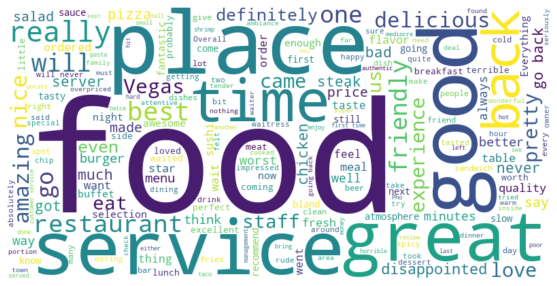

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
ps=PorterStemmer()

# Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. stemming

In [29]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [30]:
df['Review']=df['Review'].apply(transform_text)

In [31]:
df

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1
...,...,...
995,think food flavor textur lack,0
996,appetit instantli gone,0
997,overal impress would go back,0
998,whole experi underwhelm think go ninja sushi n...,0


In [32]:
word_freq = Counter(' '.join(df['Review']).split())


In [33]:
word_freq

Counter({'wow': 3,
         'love': 33,
         'place': 112,
         'crust': 2,
         'good': 95,
         'tasti': 11,
         'textur': 3,
         'nasti': 3,
         'stop': 4,
         'late': 2,
         'may': 5,
         'bank': 1,
         'holiday': 1,
         'rick': 1,
         'steve': 1,
         'recommend': 18,
         'select': 12,
         'menu': 15,
         'great': 70,
         'price': 21,
         'get': 28,
         'angri': 1,
         'want': 17,
         'damn': 4,
         'pho': 6,
         'honeslti': 1,
         'tast': 22,
         'fresh': 14,
         'potato': 9,
         'like': 51,
         'rubber': 1,
         'could': 19,
         'tell': 6,
         'made': 17,
         'ahead': 1,
         'time': 55,
         'kept': 5,
         'warmer': 1,
         'fri': 16,
         'touch': 3,
         'servic': 84,
         'prompt': 1,
         'would': 32,
         'go': 61,
         'back': 61,
         'cashier': 2,
         'care': 4,
  

In [34]:
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()


In [35]:
word_freq_df = word_freq_df.rename(columns={'index': 'word'})


In [36]:
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)


In [37]:
word_freq_df

,word,count
79,food,126
2,place,112
4,good,95
40,servic,84
18,great,70
...,...,...
968,websit,1
290,milkshak,1
970,topic,1
971,jerk,1


<AxesSubplot:xlabel='word', ylabel='count'>

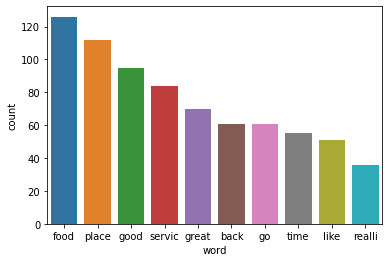

In [38]:
sns.barplot(x=word_freq_df['word'][:10],y=word_freq_df['count'][:10])

In [39]:
df

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1
...,...,...
995,think food flavor textur lack,0
996,appetit instantli gone,0
997,overal impress would go back,0
998,whole experi underwhelm think go ninja sushi n...,0


In [40]:
X=df['Review']

In [41]:
y=df['Liked']

In [42]:
X

0                                         wow love place
1                                             crust good
2                                     tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
995                        think food flavor textur lack
996                               appetit instantli gone
997                         overal impress would go back
998    whole experi underwhelm think go ninja sushi n...
999    wast enough life pour salt wound draw time too...
Name: Review, Length: 1000, dtype: object

In [43]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [45]:
tdidf_Vectorizer=TfidfVectorizer(max_features=30000)


In [46]:
tdidf_Vectorizer

TfidfVectorizer(max_features=30000)

In [47]:
# Fiting and transforming the training data


In [48]:
X_train_tfidf=tdidf_Vectorizer.fit_transform(X_train)

In [49]:
X_train_tfidf

<670x1245 sparse matrix of type '<class 'numpy.float64'>'
	with 3656 stored elements in Compressed Sparse Row format>

In [50]:
# Transforming the testing data


In [51]:
X_test_tfidf=tdidf_Vectorizer.transform(X_test)

In [52]:
X_test_tfidf

<330x1245 sparse matrix of type '<class 'numpy.float64'>'
	with 1365 stored elements in Compressed Sparse Row format>

# RandomForestClassifier

In [53]:
rfc=RandomForestClassifier()


In [54]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [55]:
y_pred=rfc.predict(X_train_tfidf)


In [56]:
accuracy_score(y_train,y_pred)

0.9985074626865672

In [57]:
y_pred=rfc.predict(X_test_tfidf)


In [58]:
accuracy_score(y_test,y_pred)

0.7666666666666667

In [59]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

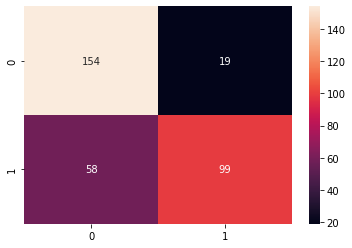

In [60]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       173
           1       0.84      0.63      0.72       157

    accuracy                           0.77       330
   macro avg       0.78      0.76      0.76       330
weighted avg       0.78      0.77      0.76       330



In [62]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=rfc.predict(input_tfidf)
    return predicted_label

In [63]:
user_input=input("Enter a comment")


Enter a commenti will recommend to  every one


In [64]:
emotion=predict_emotion(user_input)


In [65]:
print(emotion)

[1]


# LogisticRegression

In [66]:
lr=LogisticRegression()



In [67]:
lr.fit(X_train_tfidf,y_train)

LogisticRegression()

In [68]:
y_pred=lr.predict(X_train_tfidf)


In [69]:
accuracy_score(y_train,y_pred)

0.9522388059701492

In [70]:
y_pred=lr.predict(X_test_tfidf)


In [71]:
accuracy_score(y_test,y_pred)

0.7727272727272727

In [72]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

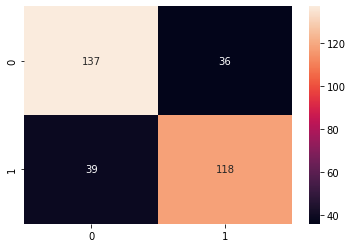

In [73]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       173
           1       0.77      0.75      0.76       157

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330



In [75]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=lr.predict(input_tfidf)
    return predicted_label

In [76]:
user_input=input("Enter a comment")


Enter a commentnot come again


In [77]:
emotion=predict_emotion(user_input)


In [78]:
print(emotion)

[0]


# KNeighborsClassifier

In [79]:
knc=KNeighborsClassifier()


In [80]:
knc.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [81]:
y_pred=knc.predict(X_train_tfidf)


In [82]:
accuracy_score(y_train,y_pred)

0.8567164179104477

In [83]:
y_pred=knc.predict(X_test_tfidf)


In [84]:
accuracy_score(y_test,y_pred)

0.7393939393939394

In [85]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

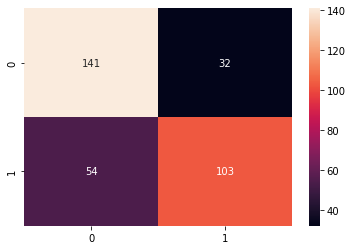

In [86]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       173
           1       0.76      0.66      0.71       157

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



In [88]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=knc.predict(input_tfidf)
    return predicted_label

In [89]:
user_input=input("Enter a comment")


Enter a commentfood is bad


In [90]:
emotion=predict_emotion(user_input)


In [91]:
print(emotion)

[0]


# XGBClassifier

In [92]:
xgb_i=xgb.XGBClassifier()

In [93]:
xgb_i.fit(X_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [94]:
y_pred=xgb_i.predict(X_train_tfidf)


In [95]:
accuracy_score(y_train,y_pred)

0.9149253731343283

In [96]:
y_pred=xgb_i.predict(X_test_tfidf)


In [97]:
accuracy_score(y_test,y_pred)

0.7181818181818181

In [98]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

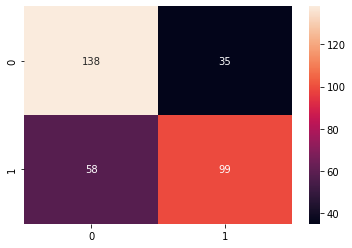

In [99]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       173
           1       0.74      0.63      0.68       157

    accuracy                           0.72       330
   macro avg       0.72      0.71      0.71       330
weighted avg       0.72      0.72      0.72       330



In [101]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=xgb_i.predict(input_tfidf)
    return predicted_label

In [102]:
user_input=input("Enter a comment")


Enter a commentfood is not taste 


In [103]:
emotion=predict_emotion(user_input)


In [104]:
print(emotion)

[0]
